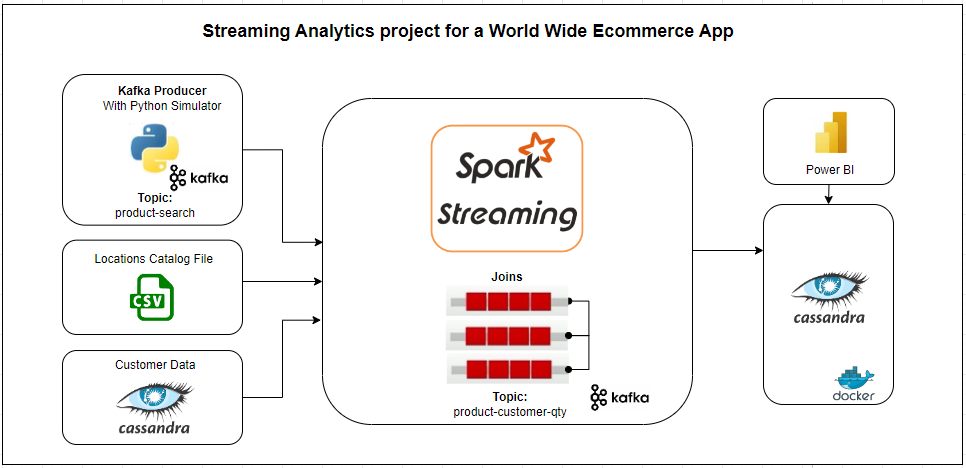

# Project Description
- **Reading**
    - Product Searches in Ecommerce App (Kafka Producer in python - **Topic "product-search"**)    
- **Data structures**
    - Json Streams of product searches with Customer ID and Locality ID
    - Join with Location Catalog in csv file
    - Join with Customers Table in Cassandra Database
- **Aggregation**
    - Number of product lookups by Location and Customer
- **Output in file or other topic** 
    - **Topic "product-custom-qty"**
- **Joins**
    - Product Search
    - Join with Location Catalog in csv file
    - Join with Customers Table in Cassandra Database
    
1. **Explain the case**
2. **Demo**
3. **Questions**

In [ ]:
!pip install kafka-python

In [13]:
from kafka import KafkaProducer
import datetime
import json
import random
import time

In [14]:
bootstrap_servers='kafka:9092'

In [15]:
# Initialize Kafka producer
producer = KafkaProducer(bootstrap_servers=bootstrap_servers,
                         value_serializer=lambda x: json.dumps(x).encode('utf-8'))

In [16]:
# Sample list of customer names
#customer_names = ["John", "Emily", "Luke", "Mary"]

file_name = 'productSearch.json'

In [17]:
#getting last id saved in json file
lastID = 0
try:
    # print(file_name.replace('.json', 'lastID.json'))
    f = open(file_name.replace('.json', 'lastIDProducer.json'))
    data = json.load(f)
    if data['id']:
        lastID = data['id']
    
    # Closing file
    f.close()
except:        
    print('File not found, ID will start in 0')

print(lastID)

232


In [18]:
counter = lastID
while True:
    # Getting the current date and time
    dt = datetime.datetime.now()

    # getting the timestamp
    # ts = datetime.datetime.timestamp(dt)

    # Convert the datetime object to a string in a specific format
    dt_str = dt.strftime("%Y-%m-%d %H:%M:%S")

    counter = counter + 1

    # Generate random customer data
    search_data = {
        "id": f"{counter}",
        "product_searched": f"{random.choice(['Workout Leggins for women', 'Workout Leggins for men', 'Gildan Mens Assorted Crew T-Shirt', 'Ninja Air Frier', 'Bed Sheet', 'Apple Iphone 14', 'Samsung Tab', 'Samsung Galaxy s22', 'Samsung Galaxy s22 Ultra', 'Apple Ipad', 'Air Jordan', 'Asus Gaming Laptop', 'Water Shoes', 'Bed Pillows', 'Creatine', 'Fire Stick', 'Roku'])}",
        "customer_id": f"{random.randint(1, 20)}",
        "location_id": f"{random.randint(1, 5220)}",        
        "CreateDate": f"{dt_str}"
    }

    # Send customer data to Kafka topic (first param)
    producer.send('product-search', value=search_data)

    # save last ID in another JSON file
    with open(file_name.replace('.json', 'lastIDProducer.json'), "w") as f:
        # write the customer data to the file
        json.dump({"id": counter}, f)
        # add a new line
        f.write("\n")

    # Wait for some time before sending the next data
    time.sleep(30)


KeyboardInterrupt: 

In [ ]:
# Wait for all messages to be delivered and delivery reports received
# producer.flush()

# Close the producer connection
# producer.close()
